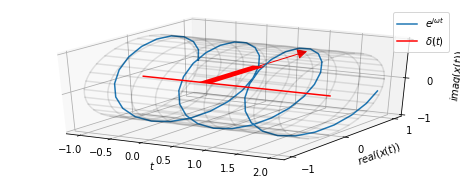

In [2]:
# -------------- Fourierova transformace pro ISS --------------------------
import numpy as np
import matplotlib.pyplot as plt

# ----- FT Diraca -- kompexni exponenciala ve 3d ... 
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# toto vse podle https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        
# funkce pro komplexni drateny barel 
def complex_cylinder(t1, t2, r, fig):
    '''kresli sedy drateny valec ve 3d tak, aby byla dobre videt komplexni exponenciala. 
    t1 je pocatecni cas
    t2 je koncovy cas 
    r je polomer
    fig je obrazek'''
    phi = np.linspace(0,2 * np.pi,100)
    t = np.linspace(t1,t2,9)
    kolo = r * np.exp(1j * phi)
    for tt in t: 
        fig.plot3D(tt * np.ones(phi.shape), np.real(kolo), np.imag(kolo),color='k',alpha=0.1)
    phi = np.linspace(0,2 * np.pi,32)
    kolo = r * np.exp(1j * phi)
    for z in kolo:        
        line=art3d.Line3D(*zip((t1,np.real(z),np.imag(z)), (t2,np.real(z),np.imag(z))), markevery=(1, 1), color='k',alpha=0.1)
        ax.add_line(line)   
        
t = np.arange(-1,2,0.05)
x = np.exp(1j*2*np.pi*t)
plt.figure(figsize=(8,3))
ax = plt.axes(projection="3d")
ax.plot3D(t, np.real(x), np.imag(x),label='$e^{j\omega t}$')
complex_cylinder(-1,2,1,ax)

def draw_Dirac_3d(t,t0,x0,mighteness,fig): # does not draw mighteness, too complicated ... 
    # pro jistotu musime na zacatek i na konec signalu vrazit nulu ... 
    # t je cela cas. osa. t0 je kde Dirac sedi, x0 jak ho chceme vysoky (obdelnicek bude 1/2 z toho)
    # mighteness je mocnost, fig pointer na obrazek. Baseline se nekresli. 
    # bude na 1/50 obrazku... 
    tfrom = t0-(np.max(t) - np.min(t))/30 # less than for 2d Dirac as there's the projection. 
    tto =   t0+(np.max(t) - np.min(t))/30
    #ttocircle = t0+(np.max(t) - np.min(t))/15
    xfrom = 0
    xto = x0/2
    a = Arrow3D([t0, t0], [0, x0], [0, 0], mutation_scale=20, 
                lw=1, arrowstyle="-|>", color="r")
    fig.add_artist(a)
    aux1 = [tfrom,tto,tto,tfrom] # t coordinates
    aux2 = [0,0,xto,xto] # real coordinates
    aux3 = [0,0,0,0] # imag coordinates
    verts = [list(zip(aux1,aux2,aux3))]
    a = mplot3d.art3d.Poly3DCollection(verts, alpha=1, linewidth=1) # alpha=1 means filled
    a.set_facecolor((1, 0, 0, 1))   # 1 is alpha
    fig.add_collection3d(a)

#    fig.fill([tfrom, tto, tto, tfrom],[xfrom, xfrom, xto, xto],color='r',fill=True,linewidth =2)
#    [ymin,ymax]=fig.get_ylim()
#    fig.set_ylim(ymin,1.1*x0)
#    fig.text(ttocircle, x0/4, mighteness, size=12,ha="center", va="center",
#             bbox=dict(boxstyle="circle",fc='white'), color='red')

delta = np.zeros(t.shape)
ax.plot3D(t, np.real(delta), np.imag(delta), color='r', label='$\delta(t)$')
draw_Dirac_3d(t,0,2,1,ax)      
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel('$real(x(t))$')
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_zlabel('$imag(x(t))$')

plt.savefig('FIG/dirac_cexp.pdf')

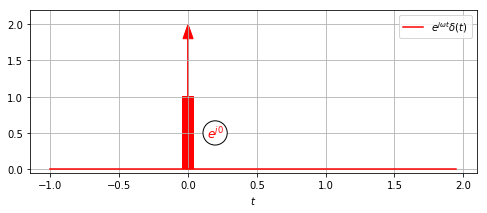

In [5]:
def draw_Dirac(t,t0,x0,mighteness,fig):
    # pro jistotu musime na zacatek i na konec signalu vrazit nulu ... 
    # t je cela cas. osa. t0 je kde Dirac sedi, x0 jak ho chceme vysoky (obdelnicek bude 1/2 z toho)
    # mighteness je mocnost, fig pointer na obrazek. Baseline se nekresli. 
    # bude na 1/50 obrazku... 
    tfrom = t0-(np.max(t) - np.min(t))/80
    tto =   t0+(np.max(t) - np.min(t))/80
    ttocircle = t0+(np.max(t) - np.min(t))/15
    xfrom = 0
    xto = x0/2
    fig.arrow(t0, 0, 0,x0, head_width=tto-tfrom, head_length=0.1*x0, length_includes_head=True, fc='red', ec='red')
    fig.fill([tfrom, tto, tto, tfrom],[xfrom, xfrom, xto, xto],color='r',fill=True,linewidth =2)
    [ymin,ymax]=fig.get_ylim()
    fig.set_ylim(ymin,1.1*x0)
    fig.text(ttocircle, x0/4, mighteness, size=12,ha="center", va="center",
             bbox=dict(boxstyle="circle",fc='white'), color='red')
 
# dirac vzorkuje ..... 
plt.figure(figsize=(8,3))
ax = plt.axes()
ax.plot(t,delta,color='r',label='$e^{j\omega t}\delta(t)$')
draw_Dirac(t,0,2,'$e^{j0}$',ax)      
ax.grid()
ax.legend()
ax.set_xlabel('$t$')

plt.savefig('FIG/Dirac_sampling_cexp.pdf')

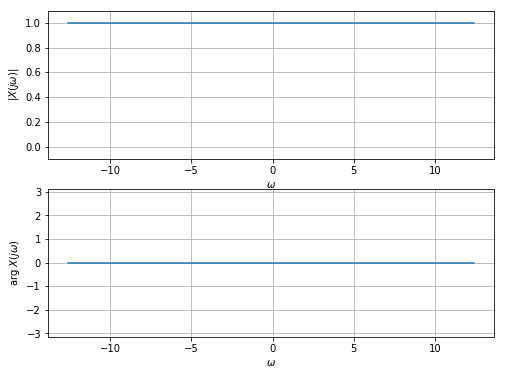

In [43]:
# konecne spektrum .... 
om = np.arange(-4*np.pi,4*np.pi,np.pi/20)
X = np.ones(om.shape)
_, ax = plt.subplots(2,1,figsize=(8,6))
ax[0].plot(om, np.abs(X))
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
ax[0].set_ylim(-0.1,1.1)
ax[0].grid()
ax[1].plot(om, np.angle(X))
ax[1].set_xlabel('$\omega$')
ax[1].set_ylim(-np.pi,np.pi)
ax[1].grid()
ax[1].set_ylabel('arg $X(j\omega)$')
plt.savefig('FIG/ft_Dirac.pdf')

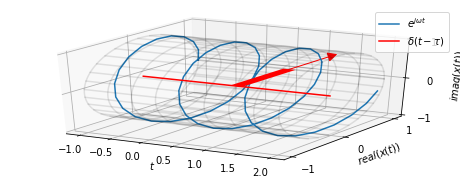

In [42]:
# -------------- posunuty Dirac 
t = np.arange(-1,2,0.05)
x = np.exp(1j*2*np.pi*t)
tau = 0.5
plt.figure(figsize=(8,3))
ax = plt.axes(projection="3d")
ax.plot3D(t, np.real(x), np.imag(x),label='$e^{j\omega t}$')
complex_cylinder(-1,2,1,ax)
delta = np.zeros(t.shape)
ax.plot3D(t, np.real(delta), np.imag(delta), color='r', label='$\delta(t-\\tau)$')
draw_Dirac_3d(t,tau,2,1,ax)      
ax.legend()
ax.set_xlabel('$t$')
ax.set_ylabel('$real(x(t))$')
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_zlabel('$imag(x(t))$')

plt.savefig('FIG/pos_dirac_cexp.pdf')

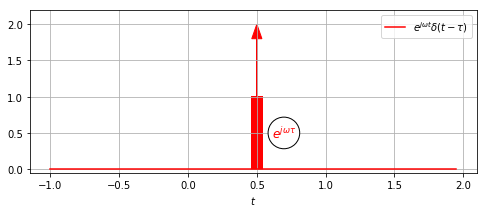

In [45]:
# dirac vzorkuje ..... 
plt.figure(figsize=(8,3))
ax = plt.axes()
ax.plot(t,delta,color='r',label='$e^{j\omega t}\delta(t-\\tau)$')
draw_Dirac(t,tau,2,'$e^{j\omega\\tau}$',ax)      
ax.grid()
ax.legend()
ax.set_xlabel('$t$')

plt.savefig('FIG/pos_Dirac_sampling_cexp.pdf')

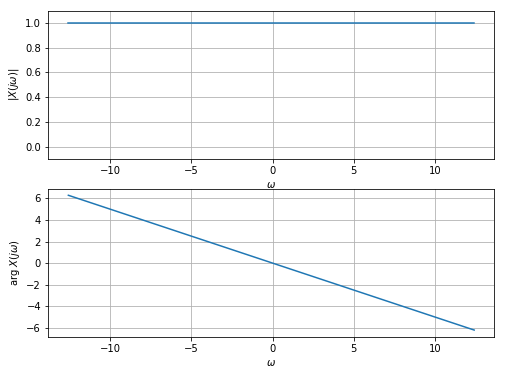

In [50]:
# konecne spektrum .... 
om = np.arange(-4*np.pi,4*np.pi,np.pi/20)
X = np.exp(-1j*om*tau)
_, ax = plt.subplots(2,1,figsize=(8,6))
ax[0].plot(om, np.abs(X))
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
ax[0].set_ylim(-0.1,1.1)
ax[0].grid()
#ax[1].plot(om, np.unwrap(np.angle(X))) ... takhle ne ... 
ax[1].plot(om, -om * tau)
ax[1].set_xlabel('$\omega$')
#ax[1].set_ylim(-np.pi,np.pi)
ax[1].grid()
ax[1].set_ylabel('arg $X(j\omega)$')
plt.savefig('FIG/ft_pos_Dirac.pdf')

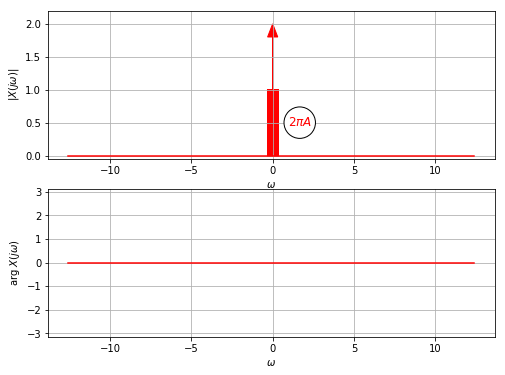

In [55]:
# spektrum ss. signalu 
om = np.arange(-4*np.pi,4*np.pi,np.pi/20)
X = np.zeros(om.shape)
_, ax = plt.subplots(2,1,figsize=(8,6))
ax[0].plot(om, np.abs(X),color='r')
draw_Dirac(om,0,2,'$2\pi A$',ax[0])      
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
ax[0].grid()
ax[1].plot(om,np.angle(X),color='r')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylim(-np.pi,np.pi)
ax[1].grid()
ax[1].set_ylabel('arg $X(j\omega)$')
plt.savefig('FIG/ft_ss.pdf')

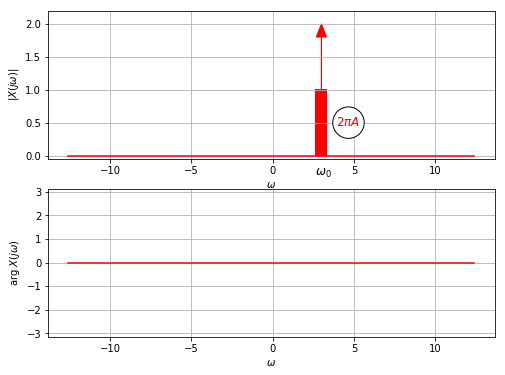

In [13]:
# spektrum c. exponencialy 
om = np.arange(-4*np.pi,4*np.pi,np.pi/20)
X = np.zeros(om.shape)
_, ax = plt.subplots(2,1,figsize=(8,6))
ax[0].plot(om, np.abs(X),color='r')
draw_Dirac(om,3,2,'$2\pi A$',ax[0])      
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
ax[0].text(2.6,-0.3,'$\omega_0$',fontsize=12)
ax[0].grid()
ax[1].plot(om,np.angle(X),color='r')
ax[1].set_xlabel('$\omega$')
ax[1].set_ylim(-np.pi,np.pi)
ax[1].grid()
ax[1].set_ylabel('arg $X(j\omega)$')
plt.savefig('FIG/ft_cexp.pdf')


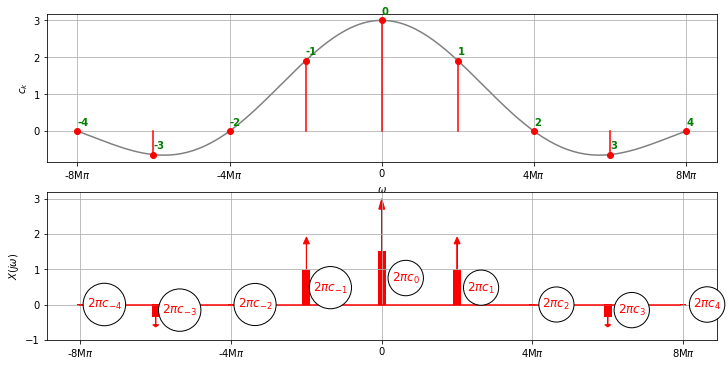

In [95]:
# FT signalu popsaneho FR 
f1 = 1000000
T1 = 1/f1 
theta = T1 / 2
D = 6 
om1 = 2 * np.pi * f1 
om_cross = 2*np.pi / theta
om = np.arange(-2*om_cross, 2*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)

kmax = int(2 * om_cross / om1) 
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)

# aaargh, need to redefine Dirac drawing for negative Diracs ... 
def draw_Dirac_pos_neg(t,t0,x0,mighteness,fig):
    # pro jistotu musime na zacatek i na konec signalu vrazit nulu ... 
    # t je cela cas. osa. t0 je kde Dirac sedi, x0 jak ho chceme vysoky (obdelnicek bude 1/2 z toho)
    # mighteness je mocnost, fig pointer na obrazek. Baseline se nekresli. 
    # bude na 1/50 obrazku... 
    tfrom = t0-(np.max(t) - np.min(t))/200
    tto =   t0+(np.max(t) - np.min(t))/200
    ttocircle = t0+(np.max(t) - np.min(t))/25
    xfrom = 0
    xto = x0/2
    fig.arrow(t0, 0, 0,x0, head_width=tto-tfrom, head_length=0.1*np.abs(x0), length_includes_head=True, fc='red', ec='red')
    fig.fill([tfrom, tto, tto, tfrom],[xfrom, xfrom, xto, xto],color='r',fill=True,linewidth =2)
    [ymin,ymax]=fig.get_ylim()
    #fig.set_ylim(ymin,1.1*x0)
    fig.text(ttocircle, x0/4, mighteness, size=12,ha="center", va="center",
             bbox=dict(boxstyle="circle",fc='white'), color='red')

omticks = np.arange(-2*om_cross,3*om_cross,om_cross)
omticklabels = ['-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$']

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,rsinc,color='gray')
ax[0].grid()
ax[0].stem(k*om1,ck,basefmt=" ",linefmt='r',markerfmt='ro')
for ii, txt in enumerate(k):
    ax[0].annotate(k[ii], (k[ii] * om1, ck[ii] + D * theta / T1 / 20),color='g',fontweight='bold')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$c_k$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
    
X = np.zeros(om.shape)    
#ax[1].plot(om,rsinc,color='gray')
ax[1].plot(om,X,color='r')
ax[1].grid()
for ii,thisk in enumerate(k):
    draw_Dirac_pos_neg(om,thisk * om1,ck[ii],'$2\pi c_{'+str(thisk)+'}$',ax[1])   
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylim(-1,3.2)
ax[1].set_ylabel('$X(j\omega)$')

plt.savefig('FIG/ft_fr.pdf')   

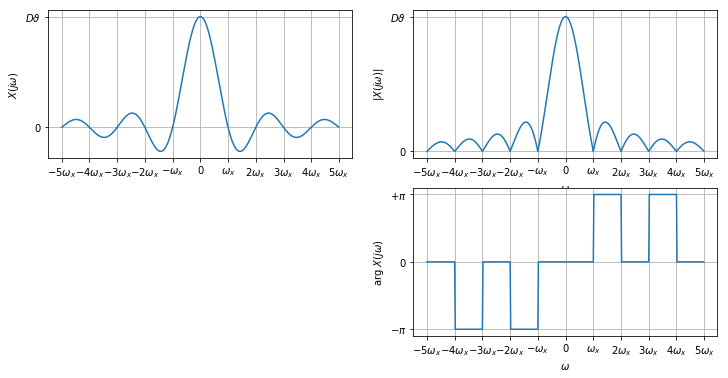

In [98]:
# ------------- FT obdelnika ------------
# --- kardinalni sin -> modul argument 
D =1 
theta = 0.17
om_cross = 2 * np.pi / theta
om = np.arange(-5*om_cross, 5*om_cross, om_cross/50)
rsinc = D * theta  * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]
omticks = np.arange(-5*om_cross, 6*om_cross, om_cross)
#omticklabels = ['$\frac{2\pi}{\vartheta}$']
omticklabels = ['$-5\omega_x$', '$-4\omega_x$','$-3\omega_x$','$-2\omega_x$','$-\omega_x$','0','$\omega_x$','$2\omega_x$','$3\omega_x$','$4\omega_x$','$5\omega_x$',]

_, ax = plt.subplots(2,2,figsize=(12,6))
ax[0,0].plot(om,rsinc)
ax[0,0].grid()
ax[0,0].set_xticks(omticks)
ax[0,0].set_xticklabels(omticklabels)
ax[0,0].set_yticks([0, D * theta])
ax[0,0].set_yticklabels(['0', '$D \\vartheta $'])
ax[0,0].set_ylabel('$X(j\omega)$')

ax[1,0].axis('off')

ax[0,1].plot(om,msinc)
ax[0,1].grid()
ax[0,1].set_xticks(omticks)
ax[0,1].set_xticklabels(omticklabels)
ax[0,1].set_yticks([0, D * theta])
ax[0,1].set_yticklabels(['0', '$D \\vartheta $'])
ax[0,1].set_xlabel('$\omega$')
ax[0,1].set_ylabel('$|X(j\omega)|$')

ax[1,1].plot(om,asinc)
ax[1,1].grid()
ax[1,1].set_xticks(omticks)
ax[1,1].set_xticklabels(omticklabels)
ax[1,1].set_yticks([-np.pi, 0 , np.pi])
ax[1,1].set_yticklabels(['$-\pi$', '0', '$+\pi$'])
ax[1,1].set_xlabel('$\omega$')
ax[1,1].set_ylabel('arg $X(j\omega)$')

plt.savefig('FIG/ft_obd.pdf')   

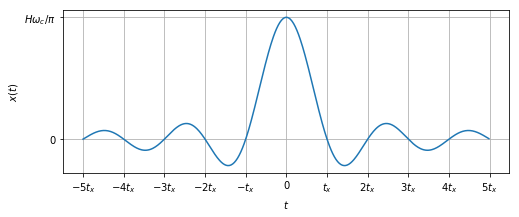

In [99]:
# -----signal odpovidajici obd spek fci ... 
H = 1
omegac = np.pi 
t_cross = np.pi / omegac

t = np.arange(-5*t_cross, 5*t_cross, t_cross/50)
x = H * omegac / np.pi * np.sinc(omegac * t / np.pi)  # deleni pi kvuli numpy. 
tticks = np.arange(-5*t_cross, 6*t_cross, t_cross)
tticklabels = ['$-5t_x$', '$-4t_x$','$-3t_x$','$-2t_x$','$-t_x$','0','$t_x$','$2t_x$','$3t_x$','$4t_x$','$5t_x$',]

plt.figure(figsize=(8,3))
ax = plt.axes()
ax.plot(t,x)
ax.grid()
ax.set_xticks(tticks)
ax.set_xticklabels(tticklabels)
ax.set_yticks([0, H * omegac / np.pi])
ax.set_yticklabels(['0', '$H \omega_c / \pi$'])
ax.set_ylabel('$x(t)$')
ax.set_xlabel('$t$')

plt.savefig('FIG/ift_obd_spek.pdf')   

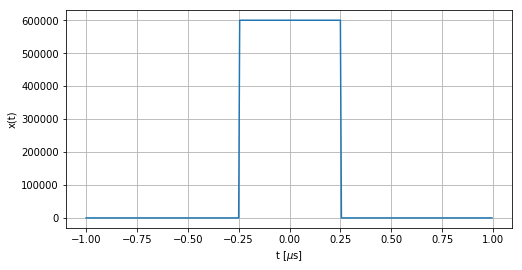

In [128]:
# ----------------- obd impuls 0.5 mikros - signal 
theta = 0.5e-6
D = 600000 
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
x[indices]=D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)') 
plt.gca().grid()
plt.savefig('FIG/obd_half_mu_sec.pdf')   

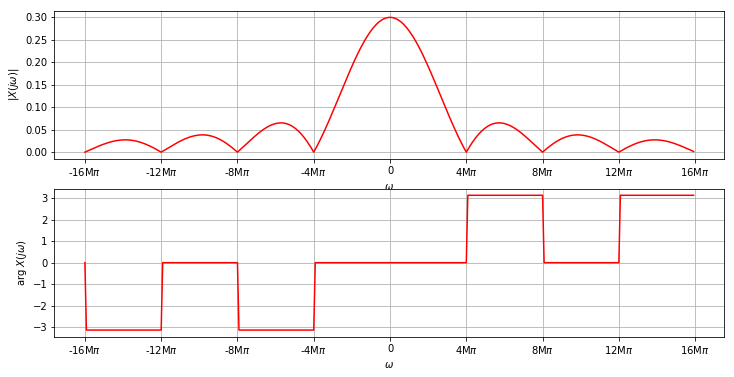

In [129]:
# --- spek 
om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,msinc,color='red')
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
    
ax[1].plot(om,asinc,color='red')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $X(j\omega)$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)

plt.savefig('FIG/ft_obd_half_mu_sec.pdf')   

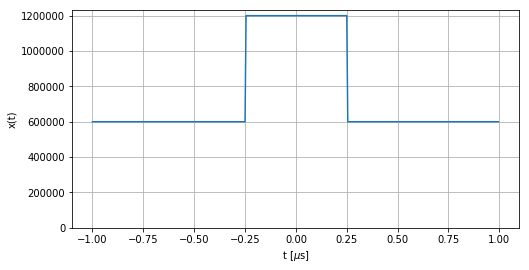

In [130]:
# ----------------- obd impuls 0.5 mikros - signal  + ss slozka 
theta = 0.5e-6
D = 600000 
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
x[indices]=D
x = x +D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)') 
plt.gca().set_ylim(0,2.05*D)
plt.gca().grid()
plt.savefig('FIG/obd_half_mu_sec_ss.pdf')   

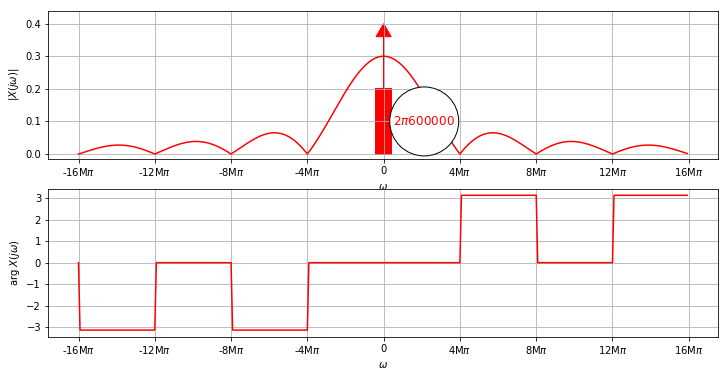

In [131]:
# --- spek 
om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,msinc,color='red')
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
draw_Dirac(om,0,0.4,'$2\pi 600000$',ax[0])
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
    
ax[1].plot(om,asinc,color='red')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $X(j\omega)$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)

plt.savefig('FIG/ft_obd_half_mu_sec_ss.pdf')   

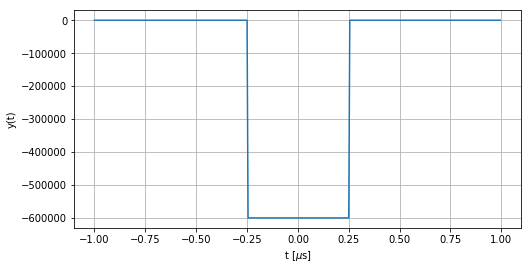

In [132]:
# ----------- minus signal 
theta = 0.5e-6
D = -600000 
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
x[indices]=D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('y(t)') 
plt.gca().grid()
plt.savefig('FIG/obd_half_mu_sec_minus.pdf')   

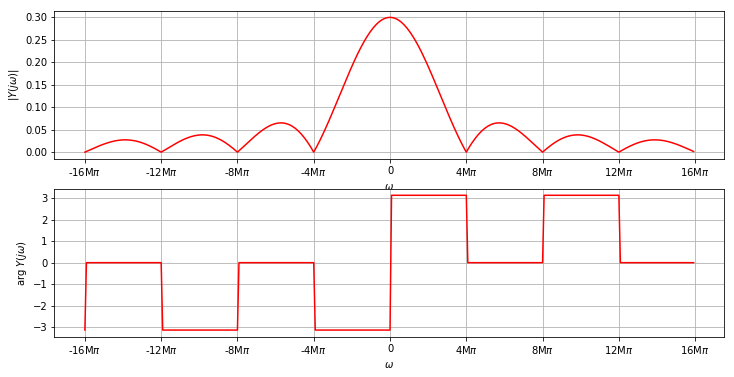

In [136]:
# --- spek 
om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

_, ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(om,msinc,color='red')
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|Y(j\omega)|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
    
ax[1].plot(om,asinc,color='red')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('arg $Y(j\omega)$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)

plt.savefig('FIG/ft_obd_half_mu_sec_minus.pdf')   

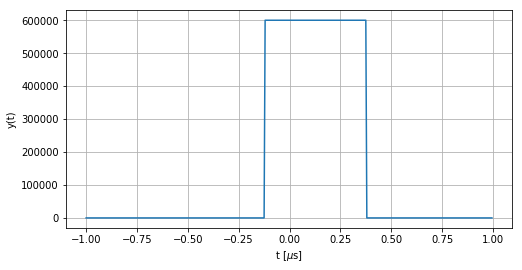

In [137]:
# ----------- ZPOZDENY signal 
theta = 0.5e-6
D = 600000 
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/4) & (t < +3*theta/4))
x[indices]=D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('y(t)') 
plt.gca().grid()
plt.savefig('FIG/obd_half_mu_sec_delayed.pdf') 

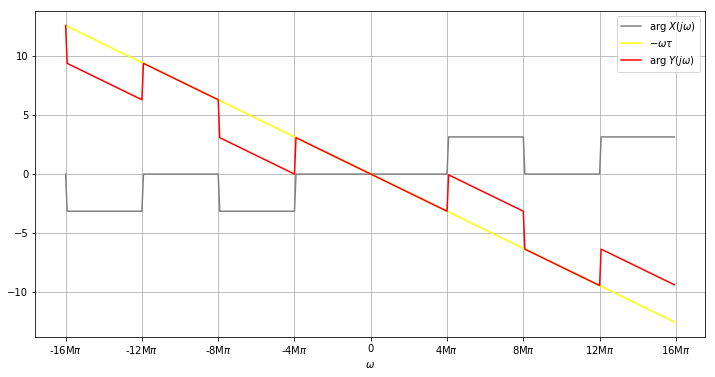

In [144]:
# --- spek - jen argument ! 
om_cross = 2*np.pi / theta
tau = 0.25e-6
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ... 
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]
corr = -om * tau
argy = asinc + corr

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

plt.figure(figsize=(12,6))
ax = plt.axes()
ax.plot(om,asinc,color='gray',label='arg $X(j\omega)$')
ax.plot(om,corr,color='yellow',label='$-\omega\\tau$')
ax.plot(om,argy,color='red',label='arg $Y(j\omega)$')
ax.grid()
ax.set_xlabel('$\omega$')
ax.set_xticks(omticks)
ax.set_xticklabels(omticklabels)
ax.legend()

plt.savefig('FIG/ft_obd_half_mu_sec_delayed.pdf')   

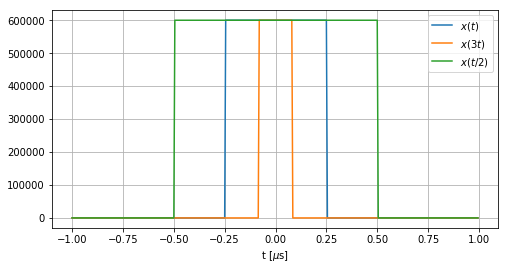

In [146]:
# ----------- prace s casem =- zrychleni a zpomaleni 
theta = 0.5e-6
D = 600000 
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
x[indices]=D
x3f = np.zeros(t.size)
indices = np.argwhere((t > -theta/2/3) & (t < +theta/2/3))
x3f[indices]=D
x2s = np.zeros(t.size)
indices = np.argwhere((t > -theta) & (t < +theta))
x2s[indices]=D

plt.figure(figsize=(8,4))
plt.plot(t*1000000,x,label='$x(t)$')
plt.plot(t*1000000,x3f,label='$x(3t)$')
plt.plot(t*1000000,x2s,label='$x(t/2)$')
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().grid()
plt.gca().legend()
plt.savefig('FIG/obd_half_mu_sec_timemodif.pdf') 

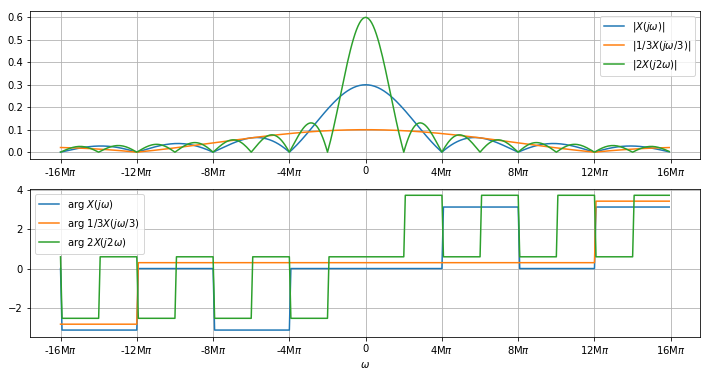

In [154]:
# --- spek 
om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]
_, ax = plt.subplots(2,1,figsize=(12,6))

littleshift=0
for m,tt in zip([1,3,1/2],['X(j\omega)','1/3 X(j\omega/3)','2 X(j2\omega)']):
    thetamod = theta / m
    rsinc = D * thetamod * np.sinc(thetamod /2 * om / np.pi)
    msinc = np.abs(rsinc)
    asinc = np.angle (rsinc) # needs a bit of massaging ... 
    asinc = np.abs(asinc)
    negindices = np.argwhere(om < 0)
    asinc[negindices] = -asinc[negindices]
    ax[0].plot(om,msinc,label='$|'+tt+'|$')
    ax[1].plot(om,asinc+littleshift,label='arg $'+tt+'$')
    littleshift += 0.3
    
ax[0].grid()
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
ax[0].legend()
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].legend()
plt.savefig('FIG/ft_obd_half_mu_sec_timemodif.pdf')   

180000.0 175454.72103582454
162508.2010046867 90.28233389149261 %


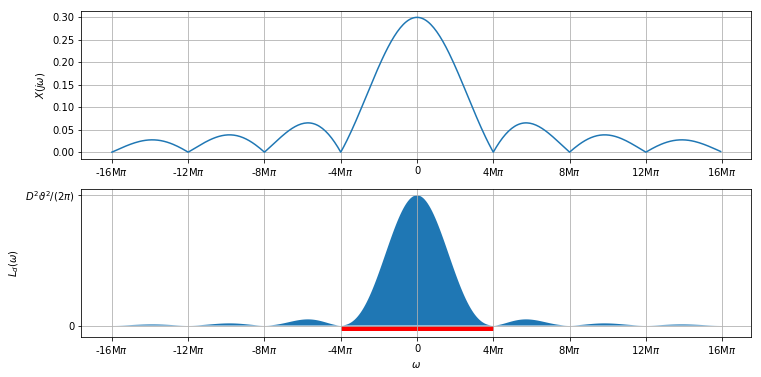

In [181]:
# --- Energie  
#x should be still signal ... integrate it to get energy !
E_from_x = np.sum(np.power(x,2)) * (theta/100)

om_cross = 2*np.pi / theta
om = np.arange(-4*om_cross, 4*om_cross, om_cross/50)
omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]
_, ax = plt.subplots(2,1,figsize=(12,6))

rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)

ax[0].plot(om,msinc)
ax[0].grid()
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)
#ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$X(j\omega)$')

Ld = np.power(msinc,2) / 2 / np.pi 
# integrate it to get energy !
E_from_Ld = np.sum(Ld) * (om_cross/50)
print(E_from_x, E_from_Ld) # ... ok not too different. 
# energy from the 1st lobe
indices = np.argwhere((om > -om_cross)  & (om < om_cross) )
E_from_Ld_main = np.sum(Ld[indices]) * (om_cross/50)
print(E_from_Ld_main, E_from_Ld_main / E_from_x * 100,'%')

ax[1].fill_between(om,Ld)
ax[1].set_ylabel('$L_d(\omega)$')
ax[1].set_yticks([0, np.power(D*theta,2)/2/np.pi])
ylabels = [0, '$D^2\\vartheta^2/(2\pi)$']
ax[1].set_yticklabels(ylabels)
ax[1].set_xticklabels(omticklabels)
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].grid()
plt.fill([om_cross, om_cross, -om_cross, -om_cross],[0, -0.0005, -0.0005, 0],color='r')

plt.savefig('FIG/Ld.pdf')   